In [1]:
import matplotlib.pyplot as plt
import tensorly as tl
from tensorly import decomposition
import numpy as np
np.set_printoptions(formatter={
    'float': lambda x: "{0:+0.5f}".format(x), 
    'double': lambda x: "{0:0.5d}".format(x),
    'complexfloat': lambda x: "{0.real:0.5f}".format(x) + '+ '[int(x.imag < 0)] + "{0.imag:0.5f}j".format(x)
})

# Hypothesis

1. The Tucker decomposition is based on SVD ($M=U\Sigma V^\dagger$). For each tensor mode we can say, that the corresponding matrix is a unitary $U$, while the core tensor represent $\Sigma V^\dagger$ (not exactly, but affected by the other matrices).
2. For $\mathbb{R}^{2^N}$ tensors $\Sigma$ matrix is always $2\times 2$ diagonal matrix with singular values. The second value is 0 is the corresponding mode is not "entangled" with the others. To be precise, if we can say that the tensor can be decomposed into a tensor product of this mode ($2\times 1$ vector) and the remaining subtensor $\mathbb{R}^{2^{N-1}}$.
3. If the second singular value is 0 (or near 0), them we will see the second half of the core tensor filled with 0 ($(0, 0)\times V^\dagger$) or near-0 values.
4. We can inspect "second halves" of each mode of core tensor to observe entanglement properties.

## Test 0

One out of 3 disentangled qubits make a zero slice in a cube of a core tensor.

### $1\otimes \{2, 3\}$

In [2]:
a = [0, 1]           # disentangled qubit 0
bc = [1, 0, 0, 1]     # bell state on 1+2
state = np.kron(a, bc)
state = state / np.linalg.norm(state)
print("Clean", state)
noise = (np.random.random(state.shape) - .5) / 10000
state = state + noise
print("Dirty", state)

Clean [+0.00000 +0.00000 +0.00000 +0.00000 +0.70711 +0.00000 +0.00000 +0.70711]
Dirty [+0.00000 +0.00002 -0.00004 -0.00003 +0.70711 -0.00005 +0.00000 +0.70709]


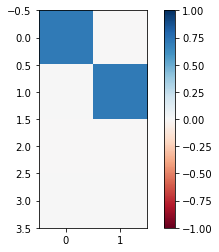

[[+0.70712 -0.00002]
 [+0.00002 +0.70707]]


In [3]:
tensor_shape = tuple([2]*3)
tensor = state.reshape(*tensor_shape)
t_core, t_matrices = tl.decomposition.tucker(tensor, rank=tensor_shape)

plt.imshow(t_core.reshape(4, -1), vmax=1, vmin=-1, cmap="RdBu")
plt.colorbar()
plt.show()

# non-0 slice, corresponding to the first singular value
print(t_core[0, :, :])

In [4]:
# slice of zeros
print(t_core[1, :, :])
assert np.allclose(t_core[1, :, :], np.zeros(t_core[1, :, :].shape), atol=1e-4), "Hypothesis failed, the slice is far from 0"

[[-0.00001 -0.00004]
 [+0.00002 +0.00001]]


In [5]:
print([t_core[i, i, i] for i in range(2)])

[0.7071241917405932, 1.3744870578639862e-05]


### $\{1, 2\} \otimes 3$

Clean [+0.00000 +0.70711 +0.00000 +0.00000 +0.00000 +0.00000 +0.00000 +0.70711]
Dirty [-0.00003 +0.70707 -0.00000 +0.00004 -0.00004 -0.00004 +0.00001 +0.70710]


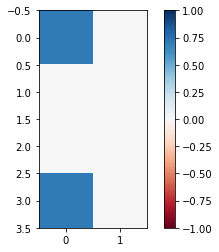

Non-0 slice
 [[+0.70710 -0.00002]
 [+0.00002 +0.70706]]


In [6]:
c = [0, 1]           # disentangled qubit 0
ab = [1, 0, 0, 1]     # bell state
state = np.kron(ab, c)
state = state / np.linalg.norm(state)
print("Clean", state)
noise = (np.random.random(state.shape) - .5) / 10000
state = state + noise
print("Dirty", state)

tensor_shape = tuple([2]*3)
tensor = state.reshape(*tensor_shape)
t_core, t_matrices = tl.decomposition.tucker(tensor, rank=tensor_shape)

plt.imshow(t_core.reshape(4, -1), vmax=1, vmin=-1, cmap="RdBu")
plt.colorbar()
plt.show()

# non-0 slice, corresponding to the first singular value
print("Non-0 slice\n", t_core[:, :, 0])

In [7]:
# slice of zeros
print(t_core[:, :, 1])
assert np.allclose(t_core[:, :, 1], np.zeros(t_core[:, :, 1].shape), atol=1e-4), "Hypothesis failed, the slice is far from 0"

[[-0.00002 -0.00005]
 [-0.00001 +0.00002]]


### $\{1, 3\}\otimes 2$

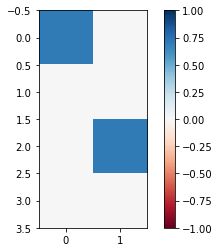

Non-0 slice
 [[+0.70714 -0.00000]
 [+0.00000 +0.70708]]


In [8]:
a = [0, 1]           # disentangled qubit 0
bc = [1, 0, 0, 1]     # bell state on 1+2
state = np.kron(a, bc)
state = state / np.linalg.norm(state)
noise = (np.random.random(state.shape) - .5) / 10000
state = state + noise

tensor_shape = tuple([2]*3)
tensor = state.reshape(*tensor_shape)

# AXIS REORDER
tensor = tl.moveaxis(tensor, [0, 1, 2], [1, 0, 2])

t_core, t_matrices = tl.decomposition.tucker(tensor, rank=tensor_shape)

plt.imshow(t_core.reshape(4, -1), vmax=1, vmin=-1, cmap="RdBu")
plt.colorbar()
plt.show()

# non-0 slice, corresponding to the first singular value
print("Non-0 slice\n", t_core[:, 0, :])

In [9]:
# slice of zeros
print(t_core[:, 1, :])
assert np.allclose(t_core[:, 1, :], np.zeros(t_core[:, 1, :].shape), atol=1e-4), "Hypothesis failed, the slice is far from 0"

[[-0.00005 -0.00004]
 [-0.00003 +0.00005]]


In [10]:
print([t_core[i, i, i] for i in range(2)])

[0.7071417147434383, 4.826999525346085e-05]


### $\{1, 3, 4\}\otimes 2$

Clean [+0.68599 +0.00000 +0.00000 +0.00000 +0.00000 +0.00000 +0.00000 +0.68599
 +0.17150 +0.00000 +0.00000 +0.00000 +0.00000 +0.00000 +0.00000 +0.17150]
Dirty [+0.68624 +0.00040 +0.00034 +0.00028 -0.00047 +0.00004 -0.00040 +0.68564
 +0.17171 -0.00025 -0.00049 +0.00040 +0.00002 -0.00001 -0.00001 +0.17172]


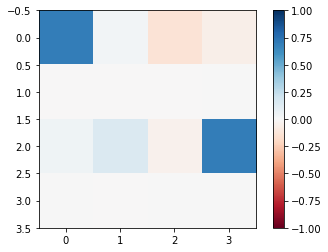

Non-0 slice
 [[[+0.69065 +0.02514]
  [-0.13857 -0.05984]]

 [[+0.04508 +0.14416]
  [-0.04667 +0.68891]]]


In [11]:
a = [4, 1]                         # disentangled qubit 0
bcd = [1, 0, 0, 0, 0, 0, 0, 1]     # GHZ state
state = np.kron(a, bcd)
state = state / np.linalg.norm(state)
print("Clean", state)
noise = (np.random.random(state.shape) - .5) / 1000
state = state + noise
state = state / np.linalg.norm(state)
print("Dirty", state)

tensor_shape = tuple([2]*4)
tensor = state.reshape(*tensor_shape)
tensor = tl.moveaxis(tensor, [0, 1, 2, 3], [1, 0, 2, 3])
t_core, t_matrices = tl.decomposition.tucker(tensor, rank=tensor_shape)

plt.imshow(t_core.reshape(4, -1), vmax=1, vmin=-1, cmap="RdBu")
plt.colorbar()
plt.show()

# non-0 slice, corresponding to the first singular value
print("Non-0 slice\n", t_core[:, 0, :, :])

In [12]:
print("0-es slice\n", t_core[:, 1, :, :])

0-es slice
 [[[-0.00018 -0.00027]
  [-0.00055 +0.00034]]

 [[+0.00013 -0.00002]
  [+0.00001 +0.00011]]]


In [13]:
print([t_core[i, i, i, i] for i in range(2)])

[0.6906515007214417, 0.00010651801280622932]


At this point we observe our hypothesis has a glance of justification.

## What if we have 2 bell pairs? how will we observe this it in the core tensor?

In [14]:
ab = [0, 7, 3, 0]      # skewed bell state
cd = [5, 0, 0, 5]     # bell state 
state = np.kron(ab, cd)
state = state / np.linalg.norm(state)
noise = (np.random.random(state.shape) - .5) / 1000000
state = state + noise

tensor_shape = tuple([2]*4)
tensor = state.reshape(*tensor_shape)
t_core, t_matrices = tl.decomposition.tucker(tensor, rank=(2, 2, 2, 2))
print(t_core)

[[[[+0.64993 +0.00000]
   [-0.00000 +0.64993]]

  [[-0.00000 -0.00000]
   [-0.00000 +0.00000]]]


 [[[+0.00000 -0.00000]
   [-0.00000 -0.00000]]

  [[-0.27854 -0.00000]
   [+0.00000 -0.27854]]]]


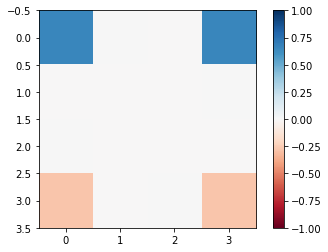

In [15]:
plt.imshow(t_core.reshape(4, -1), vmax=1, vmin=-1, cmap="RdBu")
plt.colorbar()
plt.show()

In [16]:
# not sure, but the evidence can sit here
t_core[0, 1, :, :]

array([[-0.00000, -0.00000],
       [-0.00000, +0.00000]])

In [17]:
# not sure, but the evidence can sit here
t_core[0, 1, :, :]

array([[-0.00000, -0.00000],
       [-0.00000, +0.00000]])

In [18]:
ab = [0, 7, 3, 0]      # skewed bell state
cd = [5, 0, 0, 5]     # bell state 
state = np.kron(ab, cd)
state = state / np.linalg.norm(state)
noise = (np.random.random(state.shape) - .5) / 10000
state = state + noise

tensor4_shape = (4, 2, 2)
tensor = state.reshape(*tensor4_shape)
t_core, t_matrices = tl.decomposition.tucker(tensor, rank=tensor4_shape)
print(t_core)

[[[+0.70710 +0.00005]
  [-0.00005 +0.70707]]

 [[+0.00002 -0.00006]
  [+0.00000 -0.00002]]

 [[+0.00001 +0.00001]
  [+0.00003 -0.00001]]

 [[+0.00000 +0.00000]
  [-0.00000 -0.00000]]]


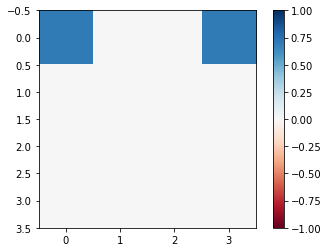

In [20]:
plt.imshow(t_core.reshape(4, -1), vmax=1, vmin=-1, cmap="RdBu")
plt.colorbar()

https://en.wikipedia.org/wiki/Tensor_rank_decomposition#Field_dependence

### Parafac?

Parafac has no "core tensor", as it is always diagonal, so it sits in coefficients vector

In [24]:
w, fac = tl.decomposition.parafac(tensor.reshape(2, 2, 2, 2), rank=2)

In [25]:
fac

[array([[+0.64991, -0.43040],
        [+0.00002, -0.00003]]),
 array([[-0.00005, -0.00005],
        [+1.00000, -1.50996]]),
 array([[+0.95922, -0.28262],
        [+0.28267, +0.95923]]),
 array([[+0.95923, -0.28264],
        [+0.28262, +0.95923]])]

In [26]:
w

array([+1.00000, +1.00000])